# 105_analysis_RQ1

## Purpose

We need to continue our exploration and analysis of our first dataset. 
This notebook will be focused on analysis for our first RQ:

* "Is there correlation between a company’s industry and location, with the funding they receive?"

This notebook will look at Ireland in particular. We will inestigate the top industries in terms of their funding and dominance in accross Ireland. Unlike in 100_analysis_RQ1 where we looked at each individual state, in this notebook we will strictly be looking at the country of Ireland as a whole as there are a lot less companies in Ireland, in our dataset. Once we have analysised and normalized these values in enough detail, we will be able to conclude this RQ.

This notebook mainly focuses on two things in particular:
* Calculating the dominance of each industry accross Ireland, in terms of the number of companies in each industry, as a fraction.
* Calculating the dominance of each industry accross Ireland, in terms of the amount of funding companies in each industry demand, as a fraction.
* After calculating the above two figures, we get a normalized value in order to make our results more accurate.


## Datasets
* _Input_: 300_dataset1.pkl
* _Output_: 105_analysis_RQ1.pkl



In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['patch.force_edgecolor'] = True

# Industry and Location

## Importing dataset 1

We are using the same dataset (dataset 1) as used in 100_analysis_RQ1. This dataset contains information about each company, including information such as the category/categories the company operates under, the amount of funding the company has recieved in USD, as well as the company name and location. These are the main pieces of information we will be dealing with for research question 1.

In [3]:
industry = pd.read_pickle('../../data/processed/300_dataset1.pkl')
industry.shape

(78357, 53)

As emphaised in 100_analysis_RQ1, below we have printed the first 5 rows in the dataset. This is important for us to do at the beginning of our notebooks as it gives us an insight into the dataframe we will be dealing with for our analysis.

In [4]:
industry.head(5)

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,Intel,"company,investor",USA,CA,SF Bay Area,Santa Clara,ipo,"Hardware,Manufacturing,Product Design,Semicond...","Design,Hardware,Manufacturing,Science and Engi...",1,2510000.0,1968-07-31,1968-07-18,10000+,1e4f199c-363b-451b-a164-f94571075ee5,company,organization,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Intercomp,company,USA,OH,Cleveland,Medina,operating,"Hardware,Software","Hardware,Software",1,549000.0,1970-12-31,1968-01-01,101-250,6681b1b0-0cea-6a4a-820d-60b15793fa66,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Microsoft,"company,investor",USA,WA,Seattle,Redmond,ipo,"Cloud Computing,Collaboration,Consumer Electro...","Consumer Electronics,Hardware,Internet Service...",1,1000000.0,1981-09-01,1975-04-04,10000+,fd80725f-53fc-7009-9878-aeecf1e9ffbb,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Compaq,"company,investor",USA,CA,SF Bay Area,Palo Alto,acquired,"Hardware,Information Technology,Software","Hardware,Information Technology,Software",1,1500000.0,1982-02-14,1982-02-14,11-50,10a3b2fd-b142-046b-7d8f-3b1aa4877aca,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Toyota Motor Corporation,"company,investor",JPN,Unknown,Unknown,Unknown,ipo,"Automotive,Mobile,Transportation","Mobile,Transportation",1,42000000.0,1982-04-14,1937-08-28,10000+,12b90373-ab49-a56a-4b4e-c7b3e9236faf,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


It is interesting to have a look at the number of employees working in the companies of our dataset, as we expected the there are a lot more companies with a smaller number of employees. This is quite intuitive as it is obviously a lot easier to set up a company with a smaller number of staff in comparison with the larger companies employing upwards of 1000 employees.

In [5]:
industry['employee_count'].value_counts()

11-50         25371
1-10          24983
unknown       12502
51-100         6532
101-250        3083
251-500        1886
501-1000       1789
1001-5000       999
10000+          662
5001-10000      550
Name: employee_count, dtype: int64

In [6]:
industry_list = ['Administrative Services',  'Advertising',  'Agriculture and Farming',  'Biotechnology',  'Clothing and Apparel',  'Commerce and Shopping',  'Community and Lifestyle',  'Consumer Goods',  'Content and Publishing',  'Design',  'Education',  'Energy',  'Events',  'Food and Beverage',  'Government and Military',  'Hardware',  'Health Care',  'Manufacturing',  'Media and Entertainment',  'Music and Audio',  'Natural Resources',  'Navigation and Mapping',  'Platforms',  'Privacy and Security',  'Professional Services',  'Real Estate',  'Sales and Marketing',  'Science and Engineering',  'Sports',  'Sustainability',  'Transportation',  'Travel and Tourism',  'Video', 'Technology',  'Finance',  'Communication']

# IRELAND - ANALYSIS
As mentioned in the opening cell of this notebook, we will only be focusing on the analysis of Ireland in this notebook. To begin we have to create a dataframe containing only the companies with a country code of "IRL". Once again we print the first 5 rows of this new dataframe for clarity and to ensure that we have a clear view of the dataframe we are dealing with in order to pursue with our analysis. Coincidentally, the company in the last row of our dataframe was cofounded by our lecturer, Prof. Barry Smyth. 

In [7]:
ireland_df = industry[industry['country_code'] == 'IRL']

In [8]:
ireland_df.head(5)

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
325,Gaiacom Wireless Networks,company,IRL,Unknown,IRL - Other,Tullamore,closed,"Apps,Mobile","Apps,Mobile,Software",1,500000.0,1999-12-07,1999-12-07,11-50,28ccfc23-5a8c-6621-87b5-ec0fe39924c5,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
455,oCen Communications,company,IRL,Unknown,Dublin,Dublin,operating,"Communications Infrastructure,Internet,Interne...","Hardware,Internet Services",1,8000000.0,2000-01-13,1997-01-01,unknown,ae78466b-5b83-979a-4255-af24c04f1253,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2179,Macalla,company,IRL,Unknown,Dublin,Dublin,closed,"Mobile,Payments,Web Development","Financial Services,Mobile,Payments,Software",1,7372184.0,2000-09-15,2008-01-01,11-50,b0f94af8-4eea-d567-150a-746683e5cbb4,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2300,Servecast,company,IRL,Unknown,Dublin,Dublin,closed,"Broadcasting,Software","Media and Entertainment,Software,Video",1,35000000.0,2000-11-07,1998-01-01,101-250,0c3005b9-856c-2a5c-606b-b3db85373e98,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2352,Changingworlds,company,IRL,Unknown,Dublin,Dublin,acquired,"Apps,Mobile,Web Development","Apps,Mobile,Software",1,4000000.0,2000-12-14,1999-01-01,51-100,21ba2a7c-77f3-3006-57b5-0e1b4e9158a7,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


Printing out a list of the columns names as shown below is very beneficial when it comes to further analysis as we can now copy and paste multiple column names into future cells. By listing the column names it also gives us a different presepective into the dataframe we are dealing with.

In [9]:
list(ireland_df)

['company_name',
 'roles',
 'country_code',
 'state_code',
 'region',
 'city',
 'status',
 'category_list',
 'category_group_list',
 'funding_rounds',
 'funding_total_usd',
 'last_funding_on',
 'founded_on',
 'employee_count',
 'org_uuid',
 'primary_role',
 'type',
 'Administrative Services',
 'Advertising',
 'Agriculture and Farming',
 'Biotechnology',
 'Clothing and Apparel',
 'Commerce and Shopping',
 'Community and Lifestyle',
 'Consumer Goods',
 'Content and Publishing',
 'Design',
 'Education',
 'Energy',
 'Events',
 'Food and Beverage',
 'Government and Military',
 'Hardware',
 'Health Care',
 'Manufacturing',
 'Media and Entertainment',
 'Music and Audio',
 'Natural Resources',
 'Navigation and Mapping',
 'Platforms',
 'Privacy and Security',
 'Professional Services',
 'Real Estate',
 'Sales and Marketing',
 'Science and Engineering',
 'Sports',
 'Sustainability',
 'Transportation',
 'Travel and Tourism',
 'Video',
 'Technology',
 'Finance',
 'Communication']

** First Step... **

In order to calculate the first part of our analysis:
* The dominance of each industry accross Ireland, in terms of the number of companies in each industry, as a fraction.

We need to begin by summing up the number of industries in each category accross Ireland. This is obviously crucial in the path to obtain a fraction for the dominance of each industry in each. 
* Below we are creating a dataframe that sums the values of each column.

In [10]:
ireland_industry_sum = ireland_df[ireland_df.country_code == 'IRL'].groupby('country_code').sum().reset_index()
ireland_industry_sum

,country_code,funding_rounds,funding_total_usd,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
0,IRL,1092,1.335805e+10,5,27,8,43,10,58,13,7,25,23,28,28,5,12,0,97,90,28,79,12,13,9,6,19,23,6,48,78,20,25,24,28,21,381,54,99


** Final Step - part 1 ** 

In order to finish the calculation for the first part of our analysis:
* The dominance of each industry accross Ireland, in terms of the number of companies in each industry, as a fraction.

We obviously need to calculate the fractions. We have already gotten the number of companies in each industry accross Ireland. In the 100_analysis_RQ1 notebook we filtered out industries with less than 51 companies. In this dataframe we didn't feel the need to do this as there is obviously a lot less companies.
We now need to find the find the total numer of companies in each state and divide the number in each industry by the total number of companies. 
* Below we are calculating the fraction of each industry accross Ireland. We are doing this by dividing the total number of companies accross Ireland, by the number of companies in each industry.


In [11]:
temp_ireland = ireland_df.groupby('country_code')[industry_list].sum()
df_perc_ind_irl = temp_ireland.div(temp_ireland.sum(axis=1), axis=0)
df_perc_ind_irl

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IRL,0.003444,0.018595,0.00551,0.029614,0.006887,0.039945,0.008953,0.004821,0.017218,0.01584,0.019284,0.019284,0.003444,0.008264,0.0,0.066804,0.061983,0.019284,0.054408,0.008264,0.008953,0.006198,0.004132,0.013085,0.01584,0.004132,0.033058,0.053719,0.013774,0.017218,0.016529,0.019284,0.014463,0.262397,0.03719,0.068182


** Second Part of Analysis **

In order to calculate the second part of our analysis:
*  The dominance of each industry accross Ireland, in terms of the amount of funding companies in each industry demand, as a fraction.

We need to begin by altering our dataframe. We do this by assigning the funding amount recieved by each company in place of its industry. We essentially create a copy of our original dataframe, only replacing the binary values with funding amounts. Even though the funding amounts will be repeated for companies in multiple industries, this will be consistent accross the whole dataframe. We will also be only be comparing individual industries, so this will have no negative impact on our results
* Below we are creating a dataframe replaces the binary values with the funding amounts of the respective company.

In [12]:
irl_fund_df = ireland_df.copy()
irl_fund_df.loc[irl_fund_df['Commerce and Shopping'] == 1 , 'Commerce and Shopping'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Biotechnology'] ==1 , 'Biotechnology'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Technology'] ==1 , 'Technology'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Health Care'] ==1 , 'Health Care'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Hardware'] ==1 , 'Hardware'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Media and Entertainment'] ==1 , 'Media and Entertainment'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Science and Engineering'] ==1 , 'Science and Engineering'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Communication'] ==1 , 'Communication'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Sales and Marketing'] == 1 , 'Sales and Marketing'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Finance'] == 1 , 'Finance'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Administrative Services'] ==1 , 'Administrative Services'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Advertising'] == 1 , 'Advertising'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df[ 'Agriculture and Farming'] == 1 ,  'Agriculture and Farming'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Clothing and Apparel'] ==1 ,  'Clothing and Apparel'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Community and Lifestyle'] == 1 , 'Community and Lifestyle'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Consumer Goods'] == 1 ,  'Consumer Goods'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Content and Publishing'] ==1 , 'Content and Publishing'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Design'] == 1 , 'Design'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Education'] == 1 , 'Education'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Energy'] ==1 , 'Energy'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Events'] == 1 , 'Events'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Food and Beverage'] == 1 , 'Food and Beverage'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Government and Military'] ==1 ,  'Government and Military'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Manufacturing'] == 1 , 'Manufacturing'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Music and Audio'] == 1 , 'Music and Audio'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Natural Resources'] ==1 ,  'Natural Resources'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Navigation and Mapping'] == 1 , 'Navigation and Mapping'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Platforms'] == 1 , 'Platforms'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Privacy and Security'] ==1 ,  'Privacy and Security'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Professional Services'] == 1 , 'Professional Services'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Real Estate'] == 1 , 'Real Estate'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Sports'] ==1 ,  'Sports'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Sustainability'] == 1 , 'Sustainability'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Transportation'] == 1 , 'Transportation'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Travel and Tourism'] ==1 ,  'Travel and Tourism'] = irl_fund_df['funding_total_usd']
irl_fund_df.loc[irl_fund_df['Video'] == 1 , 'Video'] = irl_fund_df['funding_total_usd']
irl_fund_df.head(5)


,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
325,Gaiacom Wireless Networks,company,IRL,Unknown,IRL - Other,Tullamore,closed,"Apps,Mobile","Apps,Mobile,Software",1,500000.0,1999-12-07,1999-12-07,11-50,28ccfc23-5a8c-6621-87b5-ec0fe39924c5,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0.0,500000.0
455,oCen Communications,company,IRL,Unknown,Dublin,Dublin,operating,"Communications Infrastructure,Internet,Interne...","Hardware,Internet Services",1,8000000.0,2000-01-13,1997-01-01,unknown,ae78466b-5b83-979a-4255-af24c04f1253,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000000.0,0.0,0.0
2179,Macalla,company,IRL,Unknown,Dublin,Dublin,closed,"Mobile,Payments,Web Development","Financial Services,Mobile,Payments,Software",1,7372184.0,2000-09-15,2008-01-01,11-50,b0f94af8-4eea-d567-150a-746683e5cbb4,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7372184.0,7372184.0,7372184.0
2300,Servecast,company,IRL,Unknown,Dublin,Dublin,closed,"Broadcasting,Software","Media and Entertainment,Software,Video",1,35000000.0,2000-11-07,1998-01-01,101-250,0c3005b9-856c-2a5c-606b-b3db85373e98,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35000000.0,35000000.0,0.0,0.0
2352,Changingworlds,company,IRL,Unknown,Dublin,Dublin,acquired,"Apps,Mobile,Web Development","Apps,Mobile,Software",1,4000000.0,2000-12-14,1999-01-01,51-100,21ba2a7c-77f3-3006-57b5-0e1b4e9158a7,company,organization,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,4000000.0


** Next Step... ** 

The next step in the process of finding the amount of funding companies in each industry demand, as a fraction is getting the sum of funding for each individual industry across Ireland. 

We do not need the whole dataframe for this analysis. We only need the columns that detail the companies country code and industry.

In [13]:
# country_code appended to start of industry_list. 
fund_sample_df_irl = irl_fund_df[['country_code']+industry_list]
fund_sample_df_irl.head(5)

,country_code,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
325,IRL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,0.0,500000.0
455,IRL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8000000.0,0.0,0.0
2179,IRL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7372184.0,7372184.0,7372184.0
2300,IRL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35000000.0,35000000.0,0.0,0.0
2352,IRL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,4000000.0


**Next...**

We want to define aggergate arguments that will allow us to sum up the funding for each industry grouping by the country code...

In [14]:
agg_args_irl = { 'country_code':'first',  # first instance of country code
                 'Administrative Services':'sum', # sum of each industry calculated
                 'Advertising':'sum',
                 'Agriculture and Farming':'sum',
                 'Biotechnology':'sum',
                 'Clothing and Apparel':'sum',
                 'Commerce and Shopping':'sum',
                 'Community and Lifestyle':'sum',
                 'Consumer Goods':'sum',
                 'Content and Publishing':'sum',
                 'Design':'sum',
                 'Education':'sum',
                 'Energy':'sum',
                 'Events':'sum',
                 'Food and Beverage':'sum',
                 'Government and Military':'sum',
                 'Hardware':'sum',
                 'Health Care':'sum',
                 'Manufacturing':'sum',
                 'Media and Entertainment':'sum',
                 'Music and Audio':'sum',
                 'Natural Resources':'sum',
                 'Navigation and Mapping':'sum',
                 'Platforms':'sum',
                 'Privacy and Security':'sum',
                 'Professional Services':'sum',
                 'Real Estate':'sum',
                 'Sales and Marketing':'sum',
                 'Science and Engineering':'sum',
                 'Sports':'sum',
                 'Sustainability':'sum',
                 'Transportation':'sum',
                 'Travel and Tourism':'sum',
                 'Video':'sum',
                 'Technology':'sum',
                 'Finance':'sum',
                 'Communication':'sum'}

We will now group the fund_sample_df using the column detailing the country code of the companies. We will use the aggergate arguments defined above.

In [15]:
irl_funds_df1 = (fund_sample_df_irl.groupby(['country_code'], sort=False, as_index=True).agg(agg_args_irl).reindex(columns=fund_sample_df_irl.columns))
irl_funds_df1.drop(labels='country_code',axis=1,inplace=True)
irl_funds_df1

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IRL,24823259.0,121961521.0,1.387759e+09,1.229339e+09,2645674.0,524676367.0,10073186.0,44241682.0,68725134.0,28043007.0,788296364.0,390061119.0,9195160.0,60617033.0,0.0,2.779241e+09,2.124407e+09,1.370904e+09,659411005.0,23221876.0,348546440.0,11803078.0,4462753.0,277011518.0,64268903.0,42355515.0,332875017.0,3.418464e+09,456698355.0,443286698.0,438227287.0,55366770.0,496949455.0,3.798230e+09,4.646367e+09,1.782743e+09


We obviously need to calculate the fractions. We have already gotten the total number of funding in each industry accross Ireland. In the 100_analysis_RQ1 notebook we filtered out industries with less than 51 companies. In this dataframe we didn't feel the need to do this as there is obviously a lot less companies.
We now need to divide the total number of funding of each industry by the total number of funding across every industry in Ireland.
* Below we are calculating the fraction of funding each industry in Ireland achieved.

In [16]:
irl_funds_df1['Total'] = irl_funds_df1.sum(axis=1)
irl_funds_df2 = irl_funds_df1.div(irl_funds_df1.Total, axis=0)
irl_funds_df2.drop(labels='Total',axis=1,inplace=True)
irl_funds_df2

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IRL,0.000878,0.004315,0.049098,0.043493,0.000094,0.018563,0.000356,0.001565,0.002431,0.000992,0.027889,0.0138,0.000325,0.002145,0.0,0.098327,0.07516,0.048501,0.023329,0.000822,0.012331,0.000418,0.000158,0.0098,0.002274,0.001498,0.011777,0.120942,0.016158,0.015683,0.015504,0.001959,0.017582,0.134378,0.164384,0.063072


** Normalization **

As we mentioned previously, we made the decision to normalize our values in order to ensure that our results are as accurate as possible. Normalizing our values avoids the possibility of any skewed results throughout our analysis.

* In order to normalize our results, we multipled the fraction of the dominance of each industry in across Ireland by the fraction of funding each industry in Ireland obtained. 

The below table shows our new, normalized values which will be used for our results.

In [17]:
normalized_df = df_perc_ind_irl * irl_funds_df2
normalized_df

,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IRL,0.000003,0.00008,0.000271,0.001288,6.446384e-07,0.000741,0.000003,0.000008,0.000042,0.000016,0.000538,0.000266,0.000001,0.000018,0.0,0.006569,0.004659,0.000935,0.001269,0.000007,0.00011,0.000003,6.524300e-07,0.000128,0.000036,0.000006,0.000389,0.006497,0.000223,0.00027,0.000256,0.000038,0.000254,0.03526,0.006113,0.0043


# Further Analysis:
 
After calculating all of the above figures and fractions, it is now time to get more of an insight into our data. In this section of the notebook we aim to look at multiple aspects of our data including: 
* The top 3 industries in Ireland in terms of funding.
* The top 3 industries in Ireland in terms of the amount of companies operating in said industry.
* The top and least funded company amount, the minimum and maximum funded company, as well as things such as the median and mean funding amount accross Ireland.

It is very important to have this extra insight into our data, as it is hugely benefical when it comes to getting our results, but it also gives us a great insight into the data within our dataframe.

** Top 3 most dominant industries, in terms of the amount of funding: **

For the first step of this further analyis we have a look at the top 3 industries across Ireland. Two of the industries that we thought would apppear in the top 3 appeared, Finance and Technology. The placing of science and engineering in the top 3 was a surprising result in our eyes.

In [18]:
irl_top_funds = irl_funds_df2.apply(lambda x: pd.Series(x.sort_values(ascending=False)
    .iloc[:3].index, 
      index=['top1','top2','top3']), axis=1).reset_index()

In [19]:
irl_top_funds

,country_code,top1,top2,top3
0,IRL,Finance,Technology,Science and Engineering


** Bar Chart ** 

Below we have plotted the results shown in the above table. It is quite insightful, and gives us more of an idea of the difference between each of the industries in the top 3. As we can see in the below bar chart Finance is significantly higher than Technology. 

In [20]:
top_funds_plot = irl_funds_df1[['Finance', 'Technology', 'Science and Engineering']]

Text(0,0.5,'Funding (USD)')

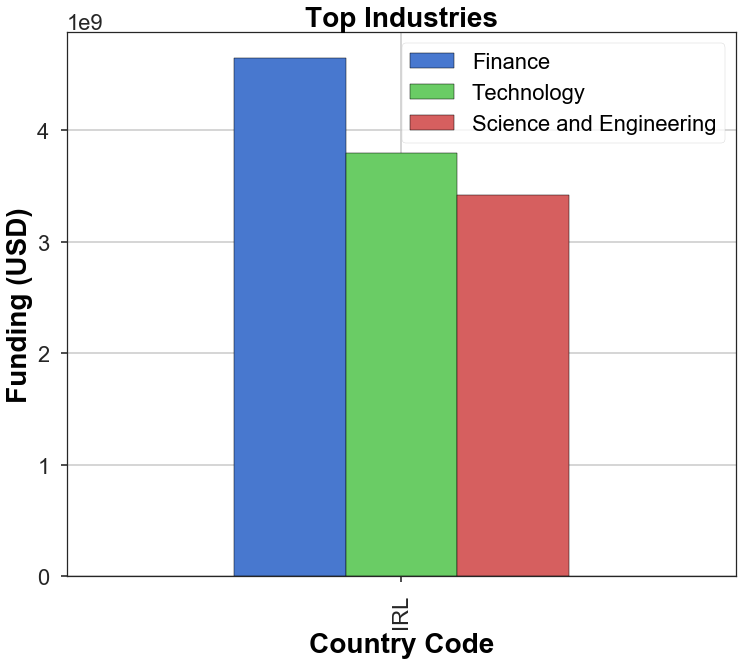

In [21]:
top_funds_plot.plot.bar(figsize=(12,10))
plt.legend(loc=1, frameon=True)
plt.xlabel("Country Code")
plt.title("Top Industries")
plt.ylabel("Funding (USD)")

** Top 3 dominant industries, in terms of the amount of companies in each of the industries: **

For the next step of this further analyis we have a look at the top 3 industries in Ireland. As we can see see in the table printed below, Technology once again features in the top 3. Surprisingly finance has not made an appearance in this table, unlike the previous table. We would have thought Technology and Finance would be the top two industries across Ireland.

In [22]:
irl_top_industry = df_perc_ind_irl.apply(lambda x: pd.Series(x.sort_values(ascending=False)
    .iloc[:3].index, 
      index=['top1','top2','top3']), axis=1).reset_index()

In [23]:
irl_top_industry

,country_code,top1,top2,top3
0,IRL,Technology,Communication,Hardware


** Bar Chart **

Below we have plotted the results shown in the above table. It is quite insightful, and gives us more of an idea of the difference between each of the industries in the top 3 across Ireland. As we can see in the below bar chart Technology towers above Communication, and hardware which trail behind in second and thrid respectively. 

In [24]:
top_industry_plot = df_perc_ind_irl[['Technology', 'Communication', 'Hardware']]

Text(0,0.5,'Normalized Value')

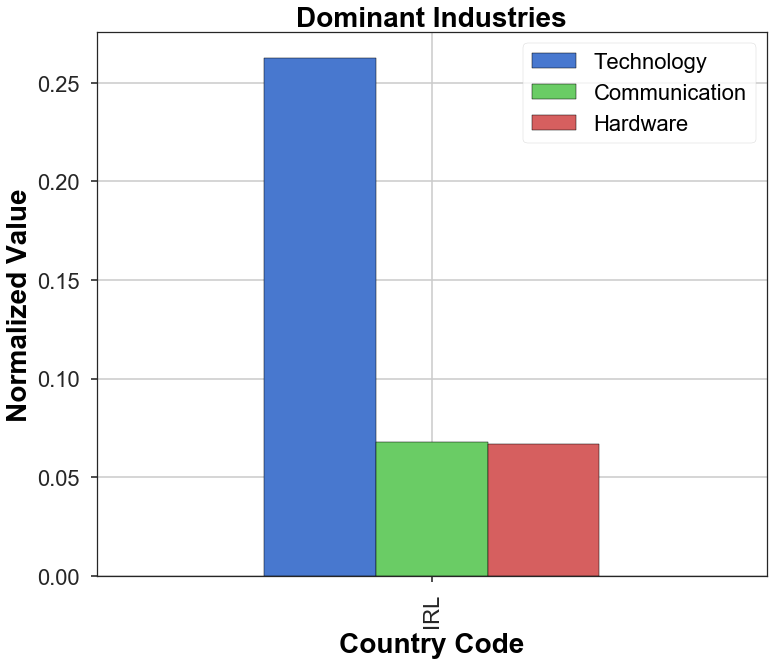

In [25]:
top_industry_plot.plot.bar(figsize=(12,10))
plt.legend(loc=1, frameon=True)
plt.xlabel("Country Code")
plt.title("Dominant Industries")
plt.ylabel("Normalized Value")

** Minimum amount raised by single company: **

We thought it would be interesting to look at the companies who raised the least amount of money. We were very surpised with the following figure of 8,014USD. This is a miniscule amount of money when compared with the huge amounts demanded by other companies in our data. As we can see in the below table only one company, 'Surface Tension' achieved this minisucle level of funding.

In [26]:
print("Min Amount")
print(ireland_df['funding_total_usd'].min())

Min Amount
8014.0


In [27]:
ireland_df[ireland_df.funding_total_usd == 8014.0]

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
28049,Surface Tension,company,IRL,Unknown,Galway,Galway,operating,"Android,iOS,Music,Software","Media and Entertainment,Mobile,Music and Audio...",1,8014.0,2013-08-22,2013-08-01,1-10,7a2e6728-4f43-fe43-fcf4-780a87343a7e,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


** Maximum amount raised by single company: **

Similar to the above, as we mentioned we also wanted to look at the companies who raised the most amount of money. As you can see in the figure below, it is a huge amount of funding. When compared with the company shown above that only achieved 8,014USD in funding, this makes the range of funding in our data huge.

In [28]:
print("Max Amount")
print(ireland_df['funding_total_usd'].max())

Max Amount
1865000000.0


In [29]:
ireland_df[ireland_df.funding_total_usd == 1865000000.0]

,company_name,roles,country_code,state_code,region,city,status,category_list,category_group_list,funding_rounds,funding_total_usd,last_funding_on,founded_on,employee_count,org_uuid,primary_role,type,Administrative Services,Advertising,Agriculture and Farming,Biotechnology,Clothing and Apparel,Commerce and Shopping,Community and Lifestyle,Consumer Goods,Content and Publishing,Design,Education,Energy,Events,Food and Beverage,Government and Military,Hardware,Health Care,Manufacturing,Media and Entertainment,Music and Audio,Natural Resources,Navigation and Mapping,Platforms,Privacy and Security,Professional Services,Real Estate,Sales and Marketing,Science and Engineering,Sports,Sustainability,Transportation,Travel and Tourism,Video,Technology,Finance,Communication
45494,Avolon Holdings,company,IRL,Unknown,Dublin,Dublin,acquired,"Aerospace,Financial Services,Leasing","Financial Services,Science and Engineering",4,1.865000e+09,2015-07-13,2010-01-01,101-250,3ec5b684-fd39-0f97-f4ca-95c2131e13d9,company,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


** Mean amount of funding accross our dataset: **

Although the range of our data is quite large, so is the mean amount of funding acieved by companies in our data. This could be due to a few very large companies earning huge amounts of funding bringing the overall mean up, it could also be due to a large amount of companies earning in and around the mean value in funding.

In [30]:
print("Mean Amount")
print(round(ireland_df['funding_total_usd'].mean(),2))

Mean Amount
22450510.24


** Median amount of funding accross our dataset: **

It is very interesting to note that the median amount of funding in our data is drastically smaller than the mean amount of funding. This is something to note when getting our results.

In [31]:
print("Median Amount")
print(ireland_df['funding_total_usd'].median())

Median Amount
1301000.0


** Standard Deviation of funding accross our dataset: **

As shown in the below figure the amount of funding levels in our data are very different.

In [32]:
print("Standard Deviation Amount")
print(round(ireland_df['funding_total_usd'].std(),2))

Standard Deviation Amount
120519489.4


### Looking at the frequency of funding values in IRL

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


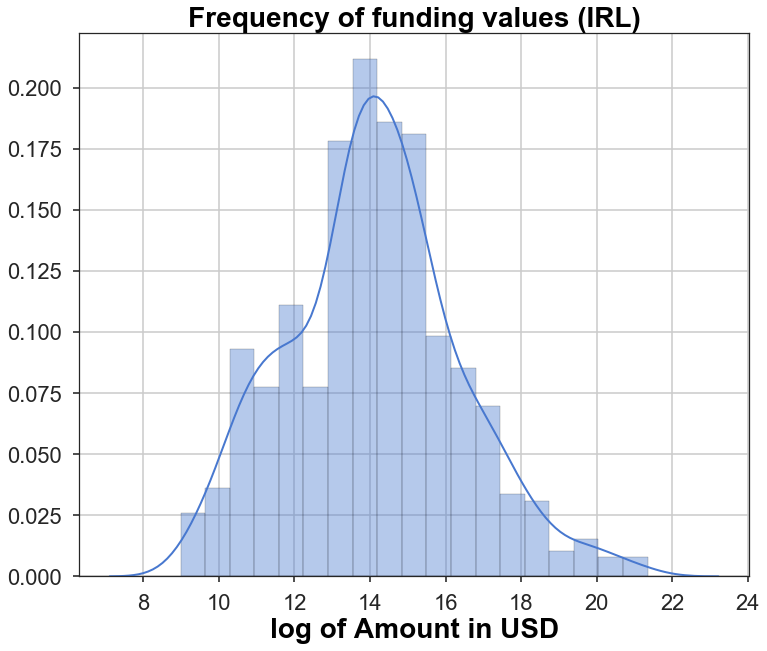

In [33]:
ireland_df['USD_log'] = np.log(ireland_df['funding_total_usd'] + 1)
plt.figure(figsize=(12,10))
sns.distplot(ireland_df['USD_log'].dropna())
plt.xlabel('log of Amount in USD')
plt.title("Frequency of funding values (IRL)")
plt.show()

### Saving resulting dataset of 105_analysis_RQ1

In [34]:
normalized_df.to_pickle("../../data/analysis/105_analysis_RQ1.pkl")